In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split

from convexmtl_torch.model.ConvexTorchCombinator import ConvexTorchCombinator
from convexmtl_torch.model.GraphLaplacianTorchCombinator import GraphLaplacianTorchCombinator
from convexmtl_torch.model.utils import NeuralNetwork

from convexmtl_torch.data.MTLSyntheticDataset import MTLClustersARegression

import torch
from torch.nn import MSELoss
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer

from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from copy import copy


In [2]:
max_epochs=50

In [3]:
mtlds = MTLClustersARegression(n_samples_per_task=100)

X, y = mtlds.X, mtlds.y

if y.ndim < 2:
    y = y[:, None]

INIT ClusREG A
INIT ClusREG
Init Synth


ic| tasks: [0, 10, 11, 12, 13, 20]
ic| colors: {0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
             10: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             11: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             12: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             13: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             20: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)}
ic| self.task_functions: {0: <function MTLClustersRegression._generate_task_functions.<locals>.<lambda> at 0x7fe2daba3e50>,
                          10: <function MTLClustersRegression._generate_task_functions.<locals>.<lambda> at 0x7fe2daba3dc0>,
                          11: <function MTLClustersRegression._generate_task_functions.<locals>.<lambda> at 0x7fe2daba3d30>,
                          12: <function MTLClustersRegression._generate_task_functions.<locals>.<lambda> at 0x7fe2daba3af0>,
            

TASK FUNCTIONS


| X_data.shape: (600, 1)


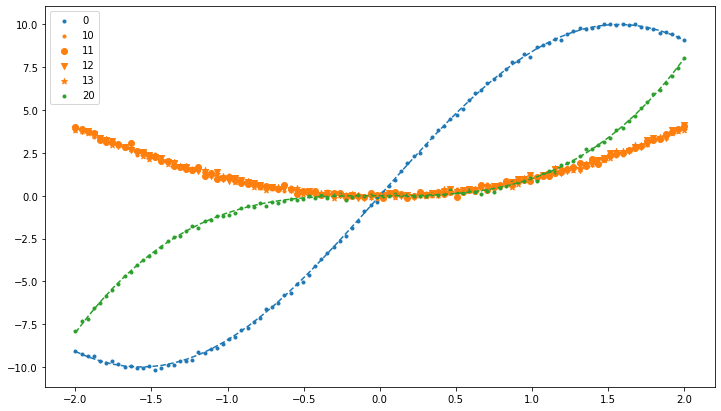

In [4]:
mtlds.plot_data_functions(X, y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_test_numpy = copy(X_test)

In [57]:
X_train, t_train = X_train[:,:-1], X_train[:,-1]
X_test, t_test = X_test[:,:-1], X_test[:,-1]
X_train, t_train, y_train = map(torch.tensor, (X_train, t_train, y_train))
X_train, t_train, y_train = map(lambda obj: obj.float(), [X_train, t_train, y_train])
X_test, t_test, y_test = map(torch.tensor, (X_test, t_test, y_test))
X_test, t_test, y_test = map(lambda obj: obj.float(), [X_test, t_test, y_test])


In [58]:
tasks = np.unique(t_train)
n_tasks = len(tasks)

In [59]:
# train_ds = TensorDataset(X_train, t_train, y_train)
train_ds = TensorDataset(X_train, t_train, y_train)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)



## ConvexMTL Torch

In [60]:
model = ConvexTorchCombinator(n_features=1, n_output=1, n_channel=1, tasks=tasks, specific_lambda=True)
# model = NeuralNetwork(n_features=1)

In [61]:
trainer = Trainer(max_epochs=max_epochs)

trainer.fit(model, train_dl)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/carlos.ruizp/miniconda3/envs/rkm/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=2)`.
  rank_zero_warn(

  | Name           | Type          | Params
-------------------------------------------------
0 | common_module_ | NeuralNetwork | 2.2 K 
-------------------------------------------------
2.2 K     Trainable params
0         Non-trainable params
2.2 K     Total params
0.009     Total estimated model params size (MB)
/home/carlos.ruizp/miniconda3/envs/rkm/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `n

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [62]:
# pred = model(X_test, t_test)
pred = model(X_test, t_test)

In [63]:
pred_numpy = pred.detach().numpy()
pred_numpy.shape

(231, 1)

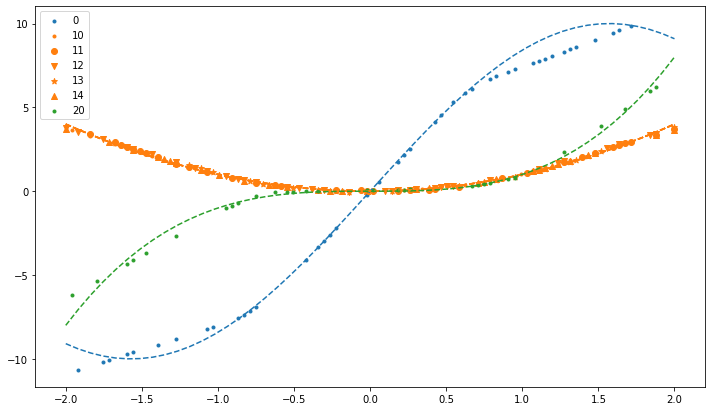

In [64]:
mtlds.plot_data_functions(X_test_numpy, pred_numpy)

In [65]:
model.get_lamb()

{0.0: array([0.45429382], dtype=float32),
 10.0: array([0.46863312], dtype=float32),
 11.0: array([0.47196746], dtype=float32),
 12.0: array([0.4726104], dtype=float32),
 13.0: array([0.4661186], dtype=float32),
 14.0: array([0.47110847], dtype=float32),
 20.0: array([0.45967373], dtype=float32)}

## GraphLaplacian Torch

In [66]:
max_epochs=50

In [74]:
model = GraphLaplacianTorchCombinator(n_features=1, n_output=1, n_channel=1, tasks=tasks, nu=10, mu=1e-4)
# model = NeuralNetwork(n_features=1)

In [75]:
trainer = Trainer(max_epochs=max_epochs)

trainer.fit(model, train_dl)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/carlos.ruizp/miniconda3/envs/rkm/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=2)`.
  rank_zero_warn(
ic| opt_kwargs: {'lr': 0.001, 'weight_decay': 0.01}

  | Name           | Type                   | Params
----------------------------------------------------------
0 | common_module_ | NeuralNetworkFeatLearn | 8.4 K 
----------------------------------------------------------
8.4 K     Trainable params
0         Non-trainable params
8.4 K     Total params
0.034     Total estimated model params size (MB)
/home/carlos.ruizp/miniconda3/envs/rkm/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does 

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [76]:
# pred = model(X_test, t_test)
pred = model(X_test, t_test)

In [77]:
pred_numpy = pred.detach().numpy()
pred_numpy.shape

(231, 1)

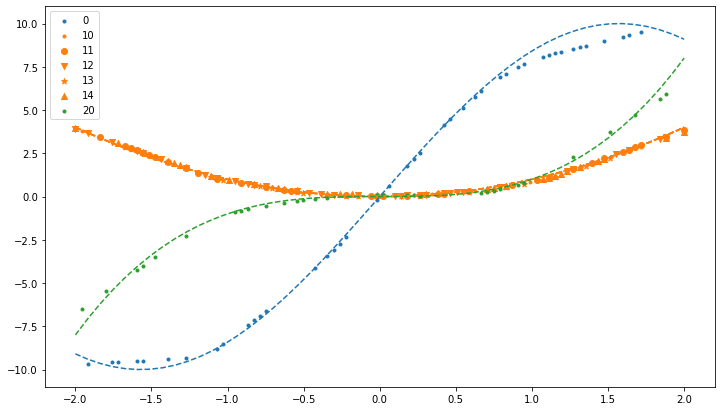

In [78]:
mtlds.plot_data_functions(X_test_numpy, pred_numpy)

In [79]:
adjMatrix = model.get_adjMatrix()

<AxesSubplot:>

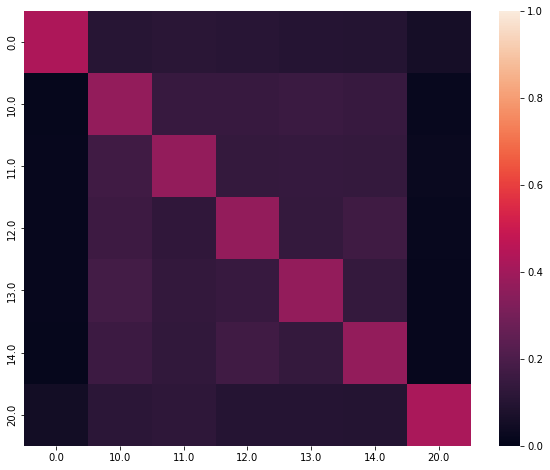

In [80]:
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = plt.gca()
sns.heatmap(adjMatrix, xticklabels=tasks, yticklabels=tasks, vmin=0, vmax=1, ax=ax)